In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Ursprüngliche Datei m. Tabul.-Trennzeichen laden
df = pd.read_csv("Reviews_all_cleaned_anonym_withsentimentanalysis.csv", sep='\t', engine='python', on_bad_lines='skip')

# Leere Spaltennamen entfernen
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Als neue CSV speichern, Beistrich Trennzeichen
df.to_csv("Reviews_cleaned_comma.csv", index=False, sep=',')


In [118]:
df.describe()

,line,Rating,Average Rating,N Reviews,Month of Visit,Year of Visit,titleSentiment,reviewSentiment
count,5267.000000,5223.000000,5222.000000,5222.000000,5127.000000,5127.000000,5267.000000,5267.000000
mean,2655.302829,4.274746,4.247319,2979.893719,6.015409,2020.142774,3.433833,3.539396
std,1542.486541,1.007131,0.497905,9899.740519,3.570258,2.780551,0.705317,0.655482
min,1.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,1.000000,2.000000
25%,1319.500000,4.000000,4.000000,125.000000,3.000000,2018.000000,3.000000,3.000000
50%,2637.000000,5.000000,4.300000,531.000000,6.000000,2020.000000,3.000000,4.000000
75%,4006.500000,5.000000,4.600000,1835.000000,9.000000,2022.000000,4.000000,4.000000
max,5323.000000,5.000000,5.000000,167313.000000,12.000000,2025.000000,5.000000,5.000000


In [119]:
# Load the CSV file again
df = pd.read_csv("Reviews_cleaned_comma.csv")

# Total number of rows
print("Number of rows:", len(df))

# Rows with more than 5 missing values
na_counts = df.isna().sum(axis=1)
rows_with_many_nas = df[na_counts > 5]
print("Rows with more than 5 NAs:", len(rows_with_many_nas))
print("Examples of such rows:")
print(rows_with_many_nas.head())

#Duplicate reviews based on Original Text
duplicates = df[df.duplicated(subset="Original Text", keep=False)]
print("Number of duplicate reviews:", len(duplicates))
print("Examples of duplicate reviews:")
print(duplicates[["Original Text"]].head())


Number of rows: 5267
Rows with more than 5 NAs: 45
Examples of such rows:
      line                       Original Title  \
1282  1285                                  NaN   
1390  1393  Lindo lugar pero podría estar mejor   
4366  4423                                  NaN   
4367  4424                                  NaN   
4368  4425                                  NaN   

                    Translated Title Original Text Translated Text  Rating  \
1282                             NaN           NaN             NaN     NaN   
1390  Nice place but could be better           NaN             NaN     3.0   
4366                             NaN           NaN             NaN     NaN   
4367                             NaN           NaN             NaN     NaN   
4368                             NaN           NaN             NaN     NaN   

     Reviewed Location Name Category               User user_id_anonym  \
1282                    NaN  unknown  882vivianaandreag         id_127   
13

In [120]:
# Make a copy of the df for cleaning
df_cleaned = df.copy()

# Remove rows with more than 5 missing values
df_cleaned = df_cleaned[df_cleaned.isna().sum(axis=1) <= 5]

# Drop duplicate reviews (looking at original text)
df_cleaned = df_cleaned.drop_duplicates(subset="Original Text", keep="first")

# Check shape after cleaning
print("Shape after cleaning:", df_cleaned.shape)

# Saving cleaned dataset
df_cleaned.to_csv("Reviews_final_cleaned.csv", index=False)


Shape after cleaning: (4884, 18)


In [121]:
df = pd.read_csv("Reviews_final_cleaned.csv")

In [122]:
df.describe()

,line,Rating,Average Rating,N Reviews,Month of Visit,Year of Visit,titleSentiment,reviewSentiment
count,4884.000000,4884.000000,4884.000000,4884.000000,4797.000000,4797.000000,4884.000000,4884.000000
mean,2556.264333,4.271499,4.246499,3013.996724,5.965187,2020.051074,3.440213,3.543202
std,1513.974890,1.012313,0.495321,9852.748097,3.557908,2.784088,0.706533,0.656710
min,1.000000,1.000000,1.000000,1.000000,1.000000,2010.000000,1.000000,2.000000
25%,1233.750000,4.000000,4.000000,129.000000,3.000000,2018.000000,3.000000,3.000000
50%,2519.500000,5.000000,4.300000,537.500000,6.000000,2019.000000,3.000000,4.000000
75%,3838.250000,5.000000,4.600000,1867.000000,9.000000,2022.000000,4.000000,4.000000
max,5323.000000,5.000000,5.000000,167309.000000,12.000000,2025.000000,5.000000,5.000000


In [123]:
# No. of unique users
num_users = df["user_id_anonym"].nunique()
print("Number of unique users:", num_users)

Number of unique users: 428


In [124]:
# Number of unique review locations
num_locations = df["Reviewed Location Name"].nunique()
print("Number of unique review locations:", num_locations)


Number of unique review locations: 2995


In [125]:
# Cleaning userIDs: drop empty or NaN values
df = df[df["user_id_anonym"].notna()]
df = df[df["user_id_anonym"].str.strip() != ""]

# (Optional) Make sure IDs are treated as strings
df["user_id_anonym"] = df["user_id_anonym"].astype(str).str.strip()


In [126]:
# Number of unique users
num_users = df["user_id_anonym"].nunique()
print("Number of unique users:", num_users)

Number of unique users: 428


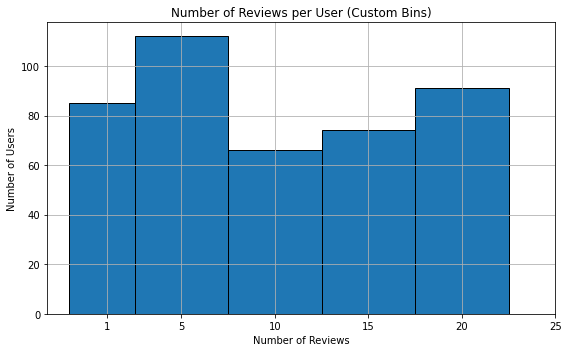

In [127]:
# Plot histogram with custom bins
# Erklärung: größte Häufigkeit ist zw. 5-10 reviews, zweitgrößte ist zwischen 15-20)
custom_bins = [1, 5, 10, 15, 20, 25]

plt.figure(figsize=(8, 5))
plt.hist(reviews_per_user, bins=custom_bins, edgecolor='black', align='left')
plt.title("Number of Reviews per User (Custom Bins)")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Users")
plt.xticks(custom_bins)
plt.grid(True)
plt.tight_layout()
plt.show()



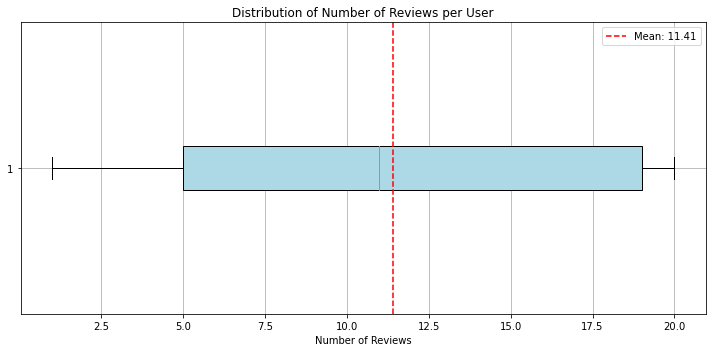

In [128]:
# Wie viele Reviews hat jeder User geschrieben 
reviews_per_user = df["user_id_anonym"].value_counts()

# Durchschnitt der Reviews pro User
mean_reviews = reviews_per_user.mean()

# Boxpl
plt.figure(figsize=(10, 5))
plt.boxplot(reviews_per_user, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Durchschnitt einzeichnen
plt.axvline(mean_reviews, color='red', linestyle='--', label=f'Mean: {mean_reviews:.2f}')

# Titel, Achsen
plt.title("Distribution of Number of Reviews per User")
plt.xlabel("Number of Reviews")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Deutung:
# 25 % der User schreiben weniger als 5 Reviews
# Die meisten User - 50 % schreiben zwischen 5 und 19 Reviews
# Mehr als 19 Reviews haben. nur die Top 25 % aktivsten Nutzer
#


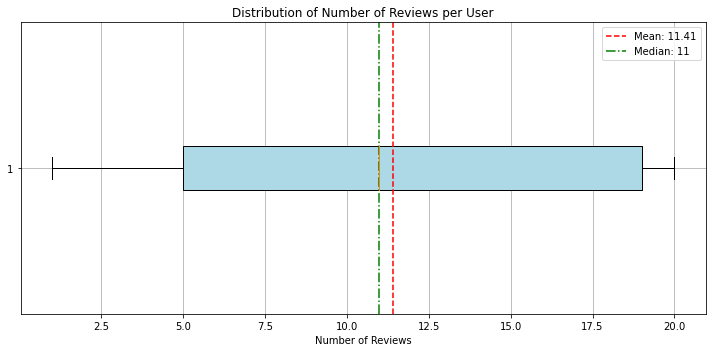

In [129]:
# Berechne: wie viele Reviews jeder User geschrieben hat
reviews_per_user = df["user_id_anonym"].value_counts()

# Durchschnitt und Median: Reviews per User
mean_reviews = reviews_per_user.mean()
median_reviews = reviews_per_user.median()

# Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(reviews_per_user, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Durchschnitt und Median einzeichnen
plt.axvline(mean_reviews, color='red', linestyle='--', label=f'Mean: {mean_reviews:.2f}')
plt.axvline(median_reviews, color='green', linestyle='-.', label=f'Median: {median_reviews:.0f}')

# Titel, Achsen
plt.title("Distribution of Number of Reviews per User")
plt.xlabel("Number of Reviews")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


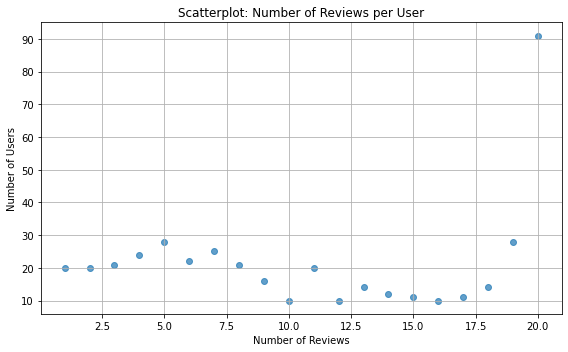

In [130]:
import numpy as np

# Prepare data: how many users have how many reviews
# Erklärung: hier sind konkrete values und die häufigkeit von exakt 20 ist am höchsten.
review_counts = reviews_per_user.value_counts().sort_index()

# Scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(review_counts.index, review_counts.values, alpha=0.7)
plt.title("Scatterplot: Number of Reviews per User")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Users")
plt.grid(True)
plt.tight_layout()
plt.show()


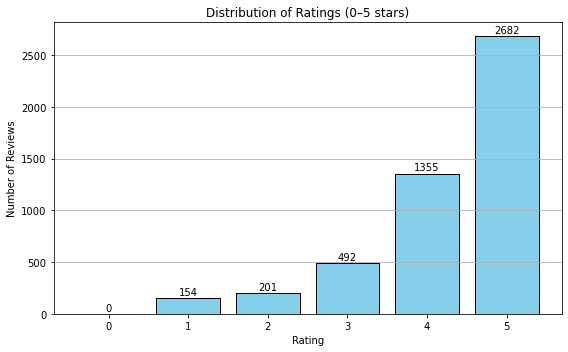

In [131]:
# Sicherstellen von numerischem Rating
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Zählen wie oft jeder Rating-Wert (0–5) vorkommt
rating_counts = df["Rating"].value_counts().reindex(range(0, 6), fill_value=0).sort_index()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index, rating_counts.values, color="skyblue", edgecolor="black")

# Zahlen anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}', ha='center', va='bottom')

plt.title("Distribution of Ratings (0–5 stars)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks(ticks=range(0, 6))
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [132]:
# Zählen wie oft jedes RAting vorkommt
rating_counts = df["Rating"].value_counts().sort_index()

# Counts anzeigen
for rating in range(6):  # 0 bis 5
    count = rating_counts.get(rating, 0)
    print(f"Rating {rating}: {count} entries")


Rating 0: 0 entries
Rating 1: 154 entries
Rating 2: 201 entries
Rating 3: 492 entries
Rating 4: 1355 entries
Rating 5: 2682 entries


In [133]:
# Most frequent countries
country_counts = df["Country"].value_counts().head(10)
print("Top 10 countries by number of reviews:")
print(country_counts)


Top 10 countries by number of reviews:
Argentina    3541
Chile         118
Uruguay       109
España         94
México         78
Italia         77
RJ             71
Perú           58
Colombia       47
Florida        35
Name: Country, dtype: int64


In [134]:
# Most frequent cities
city_counts = df["City"].value_counts().head(10)
print("Most reviewed city - number of reviews:")
print(city_counts)


Most reviewed city - number of reviews:
Salta                      414
Córdoba                    369
Buenos Aires               337
Purmamarca                 225
Ushuaia                    194
San Carlos de Bariloche    187
Tandil                      88
Tilcara                     84
El Calafate                 79
Mendoza                     78
Name: City, dtype: int64


In [213]:
# Alles was weniger als 20 reviews hat wird ausgeschlossen (nur Städte mit mehr als 20 Reviews mitnehmen)
city_review_counts = df["City"].value_counts()
valid_cities = city_review_counts[city_review_counts >= 20].index

# Durchschn. Rating pro Stadt
city_avg = df[df["City"].isin(valid_cities)].groupby("City")["Rating"].mean()

# Top cities (textuell)
top_cities = city_avg.sort_values(ascending=False).head(10)
print("Top 10 cities by average rating (min 20 reviews):")
print(top_cities)

# Worst cities (textuell)
worst_cities = city_avg.sort_values().head(10)
print("Bottom 10 cities by average rating (min 20 reviews):")
print(worst_cities)


Top 10 cities by average rating (min 20 reviews):
City
Cuzco                4.848485
La Rioja             4.806452
El Chalten           4.766667
Province of Jujuy    4.735294
Cuba                 4.657895
Humahuaca            4.608696
El Calafate          4.556962
Cafayate             4.491803
Puerto Iguazú        4.489796
Capilla del Monte    4.450000
Name: Rating, dtype: float64
Bottom 10 cities by average rating (min 20 reviews):
City
Mundo                     3.364865
Villa Carlos Paz          3.731707
Villa General Belgrano    3.897436
Santiago                  3.936508
Villa La Angostura        3.941176
Punta del Este            3.954545
Puerto Madryn             3.962963
Santa Rosa                4.000000
Búzios                    4.034483
Buenos Aires              4.097923
Name: Rating, dtype: float64


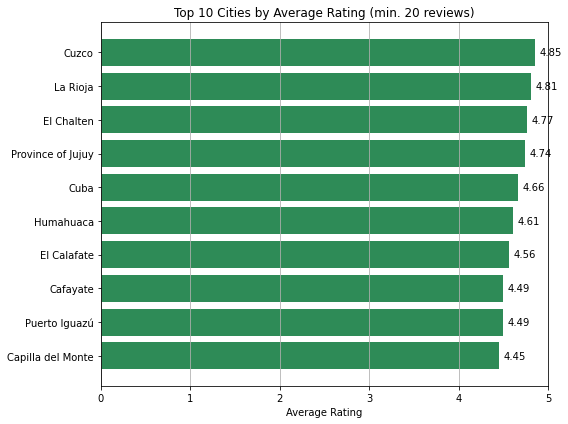

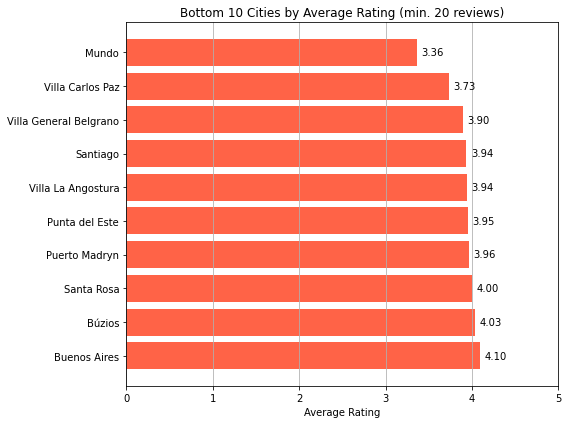

In [136]:
# Darstellung
# Top 10 Cities
plt.figure(figsize=(8, 6))
bars = plt.barh(top_cities.index[::-1], top_cities.values[::-1], color="seagreen")
plt.title("Top 10 Cities by Average Rating (min. 20 reviews)")
plt.xlabel("Average Rating")
plt.xlim(0, 5)
plt.grid(axis="x")

# Werte anzeigen (weil sehr nah aneinander)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

# Plot unterste 10 Cities
plt.figure(figsize=(8, 6))
bars = plt.barh(worst_cities.index[::-1], worst_cities.values[::-1], color="tomato")
plt.title("Bottom 10 Cities by Average Rating (min. 20 reviews)")
plt.xlabel("Average Rating")
plt.xlim(0, 5)
plt.grid(axis="x")

# Werte anzeigen
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()


Average rating per sentiment category:
reviewSentiment
2    3.089918
3    4.070387
4    4.526573
5    4.537500
Name: Rating, dtype: float64


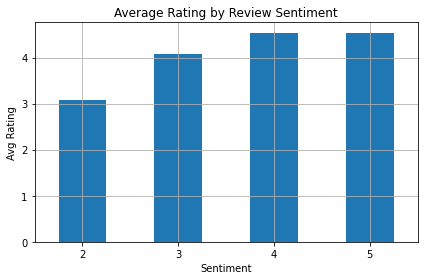

In [137]:
# Durchschn. Rating pro SEntiment Rating. average rating per sentiment category
sentiment_rating = df.groupby("reviewSentiment")["Rating"].mean()
print("Average rating per sentiment category:")
print(sentiment_rating)

# Visualisierung
sentiment_rating.plot(kind="bar", title="Average Rating by Review Sentiment", ylabel="Avg Rating", xlabel="Sentiment", rot=0)
plt.grid(True)
plt.tight_layout()
plt.show()


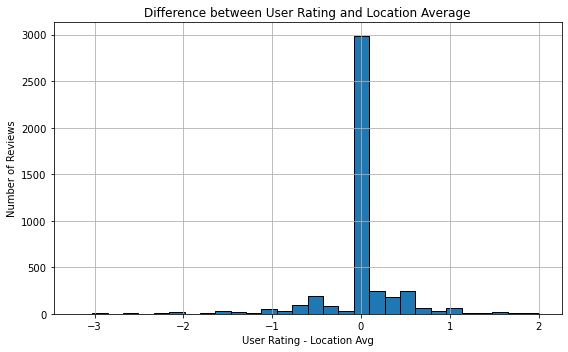

In [138]:
# Vgl. User rating <--> Location avg. Rating (lt. Tripadvisor)
# also die Differenz zw. Rating - Avg. Rating --> bei 0 ist die Übereinstimmung 100 %
df["Location Avg"] = df.groupby("Reviewed Location Name")["Rating"].transform("mean")
df["Rating Difference"] = df["Rating"] - df["Location Avg"]

# Distribution d. Unterschiede
plt.figure(figsize=(8, 5))
plt.hist(df["Rating Difference"], bins=30, edgecolor="black")
plt.title("Difference between User Rating and Location Average")
plt.xlabel("User Rating - Location Avg")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


In [139]:
# Wer hat nur 1*, wer nur 5* gegeben ("Ausreißer", die zu gut oder zu schlecht bewerten)
user_ratings = df.groupby("user_id_anonym")["Rating"]

only_5_star_users = user_ratings.filter(lambda x: (x == 5).all()).unique()
only_1_star_users = user_ratings.filter(lambda x: (x == 1).all()).unique()

print("Users who only give 5-star ratings:", len(only_5_star_users))
print("Users who only give 1-star ratings:", len(only_1_star_users))


Users who only give 5-star ratings: 1
Users who only give 1-star ratings: 0


In [140]:
from itertools import combinations
from collections import Counter

#Dictionary erstellen: user_id --> Liste von Städten
user_cities = df.groupby("user_id_anonym")["City"].apply(lambda x: list(set(x)))

# Für jeden User: Alle möglichen Städtekombinationen (2er-Paare)
city_pairs = []
for cities in user_cities:
    if len(cities) > 1:
        city_pairs.extend(combinations(sorted(cities), 2))  # alphabetisch sortiert, um Duplikate zu vermeiden

# Count Kombinationen
pair_counts = Counter(city_pairs)

# Top 10 häufigste Städtekombinationen
top_pairs = pair_counts.most_common(20)


print("Top 20 city combinations visited by same users:")
for (city1, city2), count in top_pairs:
    print(f"{city1} & {city2}: {count} users")


Top 20 city combinations visited by same users:
Purmamarca & Salta: 30 users
Buenos Aires & Salta: 25 users
Province of Jujuy & Salta: 24 users
Buenos Aires & Purmamarca: 23 users
Cafayate & Purmamarca: 20 users
Purmamarca & Tilcara: 20 users
Buenos Aires & Mundo: 20 users
Humahuaca & Purmamarca: 19 users
Cafayate & Salta: 18 users
Salta & Tilcara: 18 users
Córdoba & Mundo: 18 users
Provincia de Tierra del Fuego & Ushuaia: 17 users
Buenos Aires & Córdoba: 16 users
Province of Jujuy & Purmamarca: 15 users
Buenos Aires & Ushuaia: 15 users
Humahuaca & Tilcara: 14 users
Mundo & Salta: 14 users
Córdoba & Villa General Belgrano: 14 users
Mundo & Purmamarca: 14 users
El Calafate & Ushuaia: 14 users


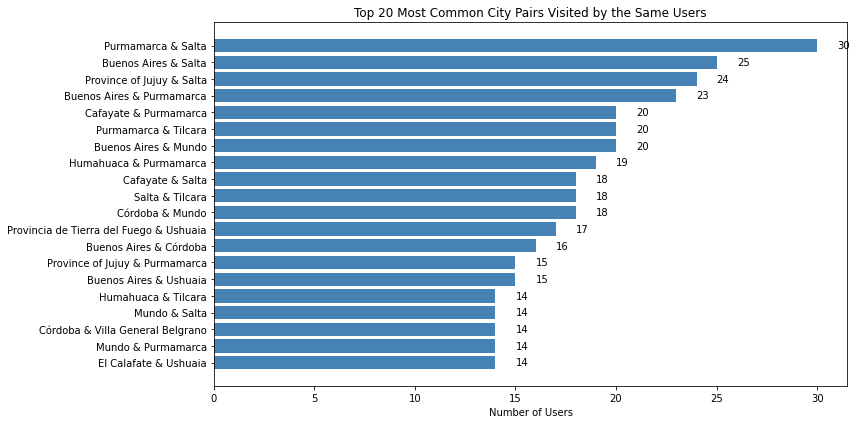

In [141]:
# mapping erstellen: user_id --> list of cities
user_cities = df.groupby("user_id_anonym")["City"].apply(lambda x: list(set(x)))

# Create all city pairs for users with more than 1 city
city_pairs = []
for cities in user_cities:
    if len(cities) > 1:
        city_pairs.extend(combinations(sorted(cities), 2))

# Alle paare zählen
pair_counts = Counter(city_pairs)

#Top 20 most common city pairs
top_pairs = pair_counts.most_common(20)

# Datapreparation für Bar-Chart
pair_labels = [f"{c1} & {c2}" for (c1, c2), _ in top_pairs]
pair_values = [count for _, count in top_pairs]

# Bar Chart plotten
plt.figure(figsize=(12, 6))
bars = plt.barh(pair_labels[::-1], pair_values[::-1], color="steelblue")
plt.xlabel("Number of Users")
plt.title("Top 20 Most Common City Pairs Visited by the Same Users")

# Labels hinzufügen, weil zu viele Balken
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.tight_layout()
plt.show()


In [142]:
# Erstellung Mapping user_id -->Set von Städten
user_cities = df.groupby("user_id_anonym")["City"].apply(lambda x: list(set(x)))

# Erstellung alle 4er-Kombinationen (nur bei Nutzern mit 4 od. mehr Städten)
city_quadruples = []
for cities in user_cities:
    if len(cities) >= 4:
        city_quadruples.extend(combinations(sorted(cities), 4))

# alle Kombis zählen
quadruple_counts = Counter(city_quadruples)

# Top 10 häufigste 4er-Kombinationen
top_quads = quadruple_counts.most_common(10)

print("Top 10 city combinations (groups of 4 cities visited by same users):")
for quad, count in top_quads:
    print(f"{', '.join(quad)}: {count} users")


Top 10 city combinations (groups of 4 cities visited by same users):
Cafayate, Humahuaca, Salta, Tilcara: 5 users
Cafayate, Humahuaca, Purmamarca, Salta: 5 users
Cafayate, Humahuaca, Purmamarca, Tilcara: 5 users
Cafayate, Purmamarca, Salta, Tilcara: 5 users
Humahuaca, Purmamarca, Salta, Tilcara: 4 users
Cafayate, Humahuaca, Iruya, Purmamarca: 4 users
Cachi, Cafayate, Purmamarca, Salta: 4 users
Buenos Aires, Mundo, Purmamarca, Salta: 4 users
Buenos Aires, Cafayate, Purmamarca, Salta: 4 users
Humahuaca, Iruya, Purmamarca, Salta: 4 users


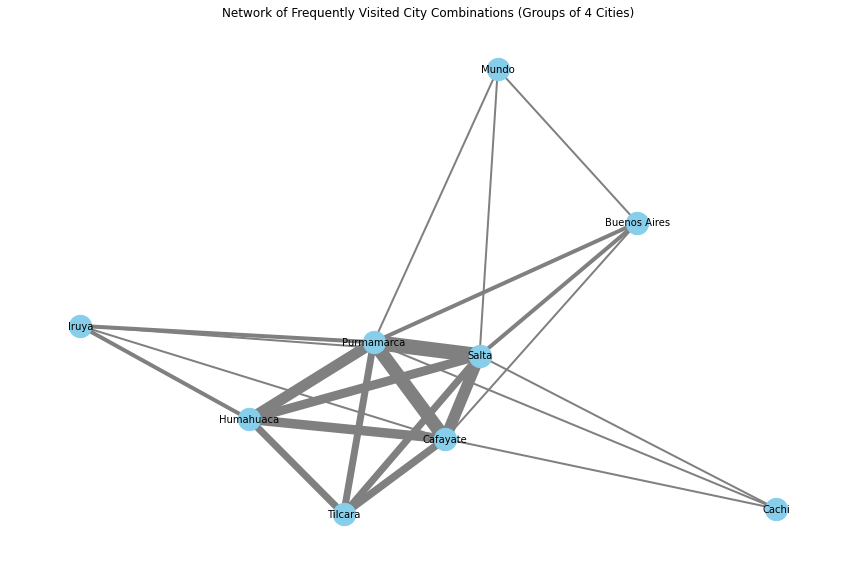

In [143]:
#import networkx as nx

# Mapping von user_id --> Set of Cities
#user_cities = df.groupby("user_id_anonym")["City"].apply(lambda x: list(set(x)))

# 4er-Kombos nur bei Usern mit 4 od mehr Städten
#city_quadruples = []
#for cities in user_cities:
#    if len(cities) >= 4:
#        city_quadruples.extend(combinations(sorted(cities), 4))

# Kombinationen zählen
#quadruple_counts = Counter(city_quadruples)

# Top 10 häufigste 4er-Kombinationen
#top_quads = quadruple_counts.most_common(10)

#Netzwerk
#G = nx.Graph()

# Knoten und Kanten hinzuf.
#for quad, count in top_quads:
#    cities = list(quad)
#    for city1, city2 in combinations(cities, 2):  # Alle 2er-Verbindungen innerhalb des Quads
#        if G.has_edge(city1, city2):
#            G[city1][city2]['weight'] += count
#        else:
#            G.add_edge(city1, city2, weight=count)

# Visualisierung
#plt.figure(figsize=(12, 8))
#pos = nx.spring_layout(G, k=0.5)  # Layout für schönere Verteilung

# Knoten
#nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# Kanten m. Gewichtung
#edges = G.edges(data=True)
#nx.draw_networkx_edges(G, pos, edgelist=edges,
#                       width=[data['weight']/2 for _, _, data in edges],
#                       edge_color='gray')

# Labels
#nx.draw_networkx_labels(G, pos, font_size=10)

#plt.title("Network of Frequently Visited City Combinations (Groups of 4 Cities)")
#plt.axis('off')
#plt.tight_layout()
#plt.show()


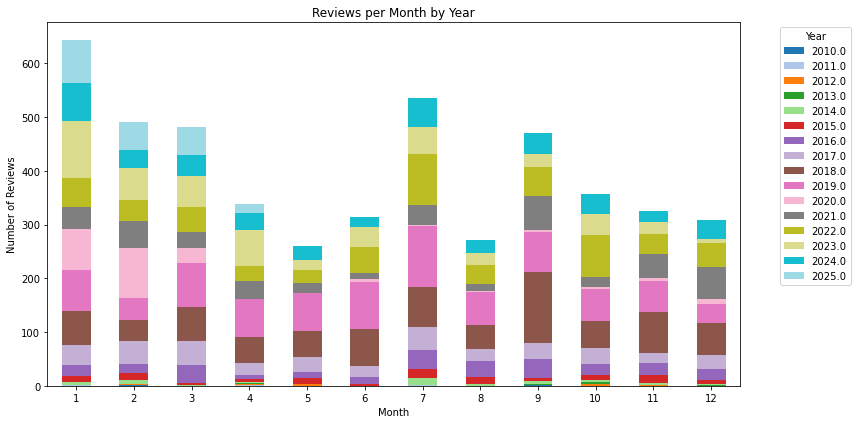

In [238]:

# Anzahl der Reviews je Jahr u. Monat
month_year_counts = df.groupby(["Year of Visit", "Month of Visit"]).size().unstack(fill_value=0)

# Monate sortieren (1–12)
month_year_counts = month_year_counts[sorted(month_year_counts.columns)]

month_year_counts.T.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("Reviews per Month by Year")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [145]:
from ipywidgets import interact, widgets

# Daten vorbereiten
month_year_counts = df.groupby(["Year of Visit", "Month of Visit"]).size().unstack(fill_value=0)
month_year_counts = month_year_counts[sorted(month_year_counts.columns)]

# Interaktive Funktion
def plot_selected_years(selected_years):
    if not selected_years:
        print("Please select at least one year.")
        return
    
    # filter - nur ausgewählte Jahre
    filtered = month_year_counts.loc[selected_years]
    
    # Transponieren für gestapeltes Balkendiagramm
    filtered.T.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
    plt.title("Stacked Bar Chart: Reviews per Month by Year")
    plt.xlabel("Month")
    plt.ylabel("Number of Reviews")
    plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Mehrfachauswahl (klappt noch nicht ganz), aber nicht so wichtig
years = sorted(month_year_counts.index.tolist())
interact(
    plot_selected_years,
    selected_years=widgets.SelectMultiple(
        options=years,
        value=[years[-1]],  # Default: letztes Jahr
        description="Years",
        layout=widgets.Layout(width='30%'),
        style={'description_width': 'initial'}
    )
)


interactive(children=(SelectMultiple(description='Years', index=(15,), layout=Layout(width='30%'), options=(20…

<function __main__.plot_selected_years(selected_years)>

In [146]:
# Konvertiere Year/Month zu numerisch (+NaNs entfernen)
df["Year of Visit"] = pd.to_numeric(df["Year of Visit"], errors="coerce")
df["Month of Visit"] = pd.to_numeric(df["Month of Visit"], errors="coerce")

# Entferne Zeilen mit fehlenden Jahres- oder Monatsangaben
df_filtered = df.dropna(subset=["Year of Visit", "Month of Visit"])


In [215]:
pio.renderers.default = 'iframe_connected'  # Oder 'notebook', auch eine Möglichkeit


# Aggregieren- AnzahlReviews je Monat und Jahr
review_data = df_filtered.groupby(["Year of Visit", "Month of Visit"]).size().reset_index(name="Reviews")

fig = go.Figure()

# Linie pro Jahr
for year in sorted(review_data["Year of Visit"].unique()):
    year_data = review_data[review_data["Year of Visit"] == year]
    fig.add_trace(go.Scatter(
        x=year_data["Month of Visit"],
        y=year_data["Reviews"],
        mode='lines+markers',
        name=str(int(year))
    ))

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'],
        title='Month'
    ),
    yaxis=dict(title='Number of Reviews'),
    title='monthly Reviews per Year',
    legend_title_text='Year',
    template='plotly_white'
)

fig.show()


In [216]:
# 'Month of Visit' numerisch
df["Month of Visit"] = pd.to_numeric(df["Month of Visit"], errors="coerce")

# Anzahl der Reviews pro Monat counten
monthly_counts = df["Month of Visit"].value_counts().sort_index()

# Stärkster Monat (höchster Wert)
strongest_month = monthly_counts.idxmax()
num_reviews = monthly_counts.max()

# Monatsnamen für interpretation, easier.
month_names = {
    1: "Januar", 2: "Februar", 3: "März", 4: "April", 5: "Mai", 6: "Juni",
    7: "Juli", 8: "August", 9: "September", 10: "Oktober", 11: "November", 12: "Dezember"
}

print(f"Strongest month through all the years: {month_names[strongest_month]} ({num_reviews} Reviews)")


Strongest month through all the years: Januar (644 Reviews)


In [149]:
df_places = pd.read_csv("all_places_enriched.csv")

In [150]:
df_places.describe()

,latitude,longitude,price level,avg. google rating
count,3203.000000,3203.000000,923.000000,3057.000000
mean,-19.092128,-56.720207,2.112676,4.379097
std,28.189662,30.845061,0.508370,0.496946
min,-54.900000,-156.513247,1.000000,0.000000
25%,-34.748829,-68.906337,2.000000,4.200000
50%,-31.420700,-64.515841,2.000000,4.500000
75%,-18.207250,-58.008483,2.000000,4.600000
max,68.008304,167.922830,4.000000,5.000000


In [151]:
df_places.head()

,Reviewed Location Name,City,Country,place_id,latitude,longitude,type,price level,avg. google rating,operational status
0,PEPERINA Restaurante,La Población,Argentina,pl_id_1,-32.059834,-65.036909,restaurant,2.0,4.3,OPERATIONAL
1,Bros Comedor,Córdoba,Argentina,pl_id_2,-31.414847,-64.192105,restaurant,2.0,4.8,OPERATIONAL
2,Holiday Inn Resort Aruba Beach Resort Casino a...,Aruba,NaN,pl_id_3,12.574943,-70.044891,lodging,NaN,4.1,OPERATIONAL
3,Bros. Comedor,Córdoba,Argentina,pl_id_4,-31.414847,-64.192105,restaurant,2.0,4.8,OPERATIONAL
4,Santuario Historico de Machu Picchu,Machu Picchu,Perú,pl_id_5,-13.163199,-72.545262,tourist_attraction,NaN,4.8,OPERATIONAL


In [217]:
# alle Reihen suchen, wo der Country Code exakt 2 Buchst. lang ist
two_letter_countries = df_places[df_places["Country"].apply(lambda x: isinstance(x, str) and len(x.strip()) == 2)]
#anzeigen
two_letter_countries


,Reviewed Location Name,City,Country,place_id,latitude,longitude,type,price level,avg. google rating,operational status


In [153]:
# Ersetze alle 2-buchstabigen Country-Einträge mit "Brazil"
df_places["Country"] = df_places["Country"].apply(
    lambda x: "Brasil" if isinstance(x, str) and len(x.strip()) == 2 else x
)

df_places.to_csv("all_places_enriched_cleaned.csv", index=False)


In [154]:
df_places = pd.read_csv("all_places_enriched_cleaned.csv")

In [155]:
df_places["Country"].value_counts().get("Brazil", 0)


0

In [156]:
# Finden v. doppelten Zeilen basierend auf Ort + Stadt + Land
duplicates = df_places.duplicated(subset=["Reviewed Location Name", "City", "Country"])
print("Number of duplicates:", duplicates.sum())

# Entferne Duplikate
#df_places = df_places[~duplicates]


Number of duplicates: 0


In [157]:
# Fehlende Werte in Prozent anzeigen
missing_pct = df_places.isna().mean().sort_values(ascending=False) * 100
print(missing_pct)


price level               71.634911
operational status         7.928703
avg. google rating         6.054087
Reviewed Location Name     4.456054
Country                    3.073141
latitude                   1.567302
longitude                  1.567302
type                       1.567302
City                       0.092194
place_id                   0.000000
dtype: float64


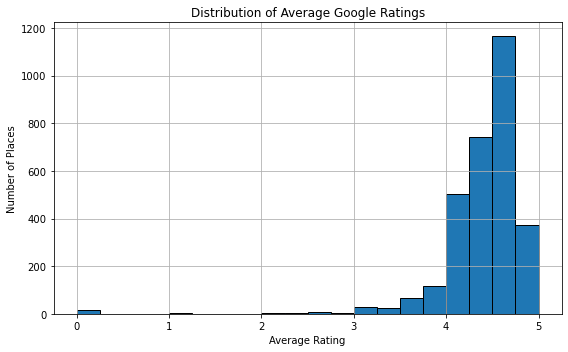

In [158]:
df_places["avg. google rating"] = pd.to_numeric(df_places["avg. google rating"], errors="coerce")

plt.figure(figsize=(8, 5))
plt.hist(df_places["avg. google rating"].dropna(), bins=20, edgecolor="black")
plt.title("Distribution of Average Google Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Places")
plt.grid(True)
plt.tight_layout()
plt.show()


In [159]:
# was für unterschiedliche places gibt es / Typen?
type_counts = df_places["type"].value_counts()
print(type_counts)


restaurant                     785
lodging                        720
tourist_attraction             345
point_of_interest              185
travel_agency                  166
                              ... 
gas_station                      1
general_contractor               1
lawyer                           1
administrative_area_level_1      1
movie_theater                    1
Name: type, Length: 73, dtype: int64


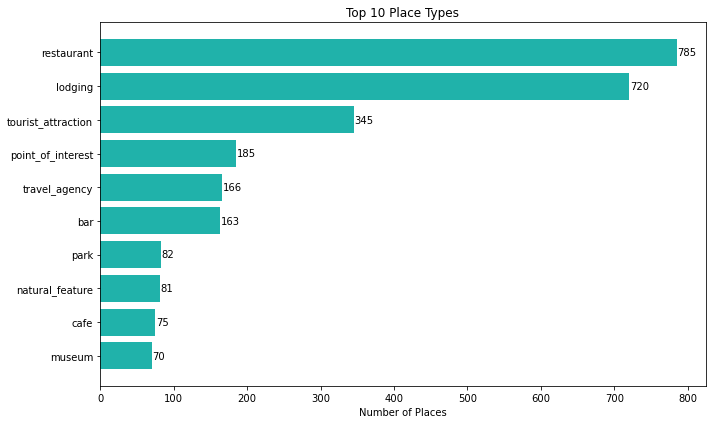

In [160]:
# Häufigkeit der Typen zählen
type_counts = df_places["type"].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(type_counts.index[::-1], type_counts.values[::-1], color='lightseagreen')
plt.xlabel("Number of Places")
plt.title("Top 10 Place Types")

# Werte hinzfügen (Lesbarkeit schlecht ansosnten)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.tight_layout()
plt.show()



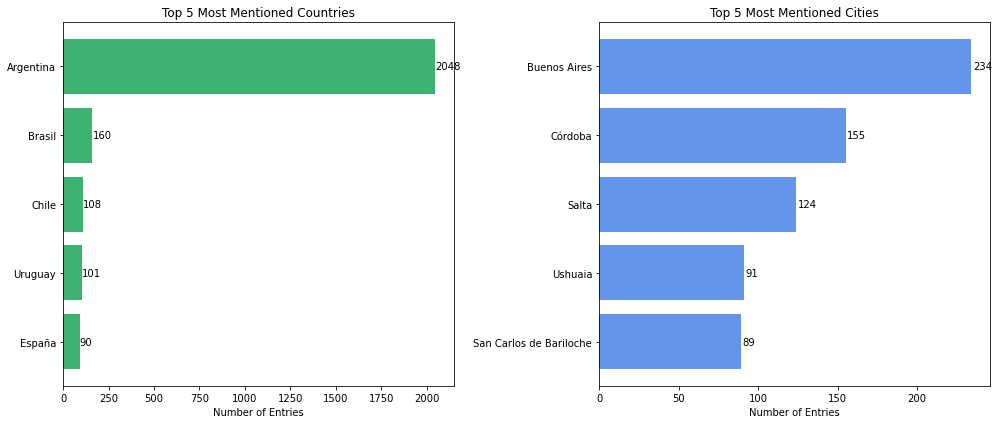

In [219]:
# Top 5 Countries and Cities
top_countries = df_places["Country"].value_counts().head(5)
top_cities = df_places["City"].value_counts().head(5)

# 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Top 5 Countries
axes[0].barh(top_countries.index[::-1], top_countries.values[::-1], color='mediumseagreen')
axes[0].set_title("Top 5 Most Mentioned Countries")
axes[0].set_xlabel("Number of Entries")
for bar in axes[0].patches:
    width = bar.get_width()
    axes[0].text(width + 1, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

# Plot Top 5 Cities
axes[1].barh(top_cities.index[::-1], top_cities.values[::-1], color='cornflowerblue')
axes[1].set_title("Top 5 Most Mentioned Cities")
axes[1].set_xlabel("Number of Entries")
for bar in axes[1].patches:
    width = bar.get_width()
    axes[1].text(width + 1, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

plt.tight_layout()
plt.show()


In [168]:
# Start von Import anderes Dataset --> von Huda et al.: Zugriff: https://data.mendeley.com/datasets/h58s544674/1, referenziert im Artikel, in den Quellen angegeben.
#ANDERES DATASET
#Commaseperated erwartet, deshalb geändert in ";" als Seperator
#
#
#
#
#
#
df_country = pd.read_csv("Country.csv", sep=";")
df_continent = pd.read_csv("Continent.csv", sep=";")
df_type = pd.read_csv("Type.csv", sep=";")
df_mode = pd.read_csv("Mode.csv", sep=";")
df_city = pd.read_csv("City.csv", sep=";")
df_region = pd.read_csv("Region.csv", sep=";")
df_user = pd.read_csv("User.csv", sep=";")
df_transaction = pd.read_csv("Transaction.csv", sep=";")
df_item = pd.read_csv("Item.csv", sep=";", on_bad_lines='skip')  # Pandas ≥ 1.3

In [169]:
print(df_transaction.columns)



Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating'],
      dtype='object')


In [221]:
# Welchen Zeitraum umspannt das Dataset
unique_years = df_transaction["VisitYear"].dropna().unique()
print(f"Years covered in dataset: {sorted(unique_years)}")
print(f"Number of unique years: {len(unique_years)}")


Years covered in dataset: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Number of unique years: 10


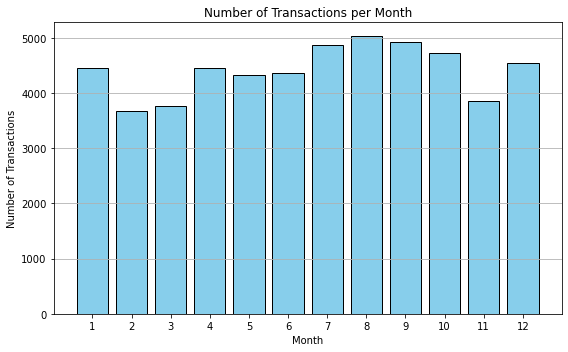

In [220]:
# in welchen Monaten gibt es die meisten visits / "Transaktionen"
plt.figure(figsize=(8, 5))
plt.bar(month_counts.index, month_counts.values, color="skyblue", edgecolor="black")
plt.title("Number of Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=range(1, 13))  # Falls 1–12 vorhanden
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Number of transactions per month:
1     4458
2     3671
3     3772
4     4445
5     4316
6     4361
7     4861
8     5026
9     4917
10    4715
11    3846
12    4542
Name: VisitMonth, dtype: int64

Strongest month: 8 with 5026 transactions


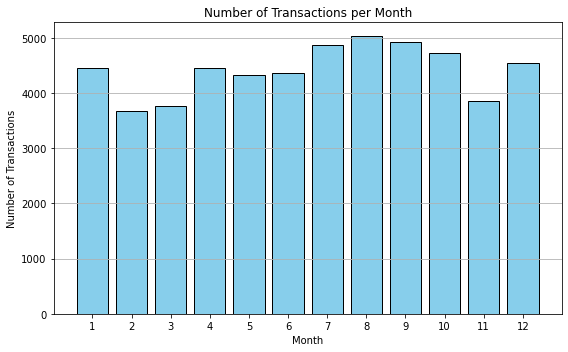

In [222]:
# Transaktionen je Monat
month_counts = df_transaction["VisitMonth"].value_counts().sort_index()

print("Number of transactions per month:")
print(month_counts)

# Stärkster Monat
strongest_month = month_counts.idxmax()
count_strongest = month_counts.max()
print(f"\nStrongest month: {strongest_month} with {count_strongest} transactions")

plt.figure(figsize=(8, 5))
plt.bar(month_counts.index, month_counts.values, color="skyblue", edgecolor="black")
plt.title("Number of Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=range(1, 13))  # Falls 1–12 vorhanden
plt.grid(axis="y")
plt.tight_layout()
plt.show()


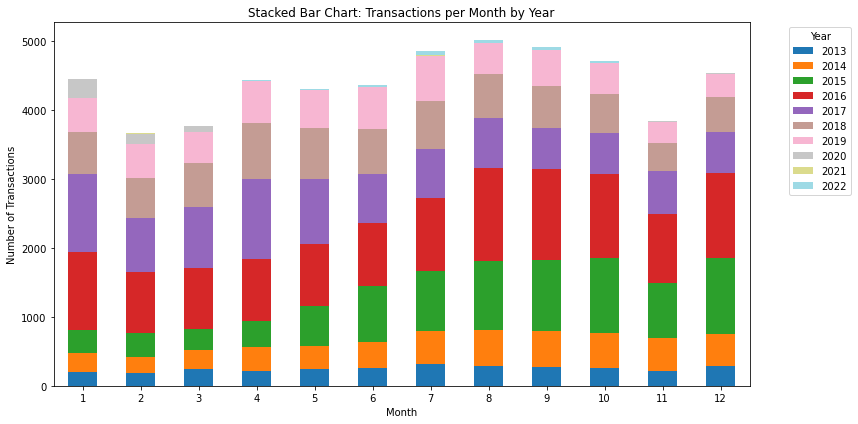

In [173]:
# Gruppierung Transaktionen nach Jahr und Monat
year_month_counts = df_transaction.groupby(["VisitYear", "VisitMonth"]).size().unstack(fill_value=0)

# Monate korrekt sorten (1–12)
year_month_counts = year_month_counts[sorted(year_month_counts.columns)]

# Transponieren für gestapeltes Balkendiagramm
year_month_counts.T.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20"
)

plt.title("Stacked Bar Chart: Transactions per Month by Year")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


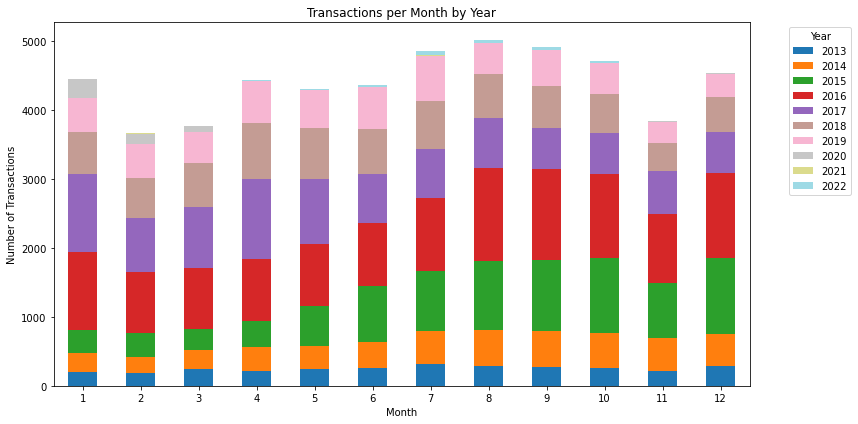

In [237]:
# Transaktionen nach Jahr und Monat groupen
year_month_counts = df_transaction.groupby(["VisitYear", "VisitMonth"]).size().unstack(fill_value=0)

# Monate korrekt 1–12 sortieren
year_month_counts = year_month_counts[sorted(year_month_counts.columns)]

# Transponiere für gestapelten Balkenplot
year_month_counts.T.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="tab20"
)

plt.title("Transactions per Month by Year")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Interpret: macht sinn - Covid hits ab ca. März 2020, dann gibt es 2020 und 2021 kaum Tourismus


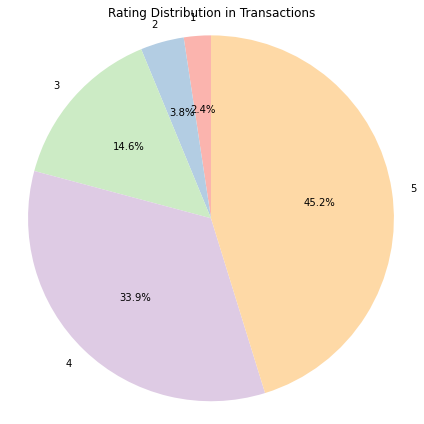

In [175]:
#Anzahl pro Ratingkategorie (1-5)
rating_counts = df_transaction["Rating"].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(
    rating_counts.values,
    labels=rating_counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)

plt.title("Rating Distribution in Transactions")
plt.axis('equal')  # Kreisform erzwingen
plt.tight_layout()
plt.show()


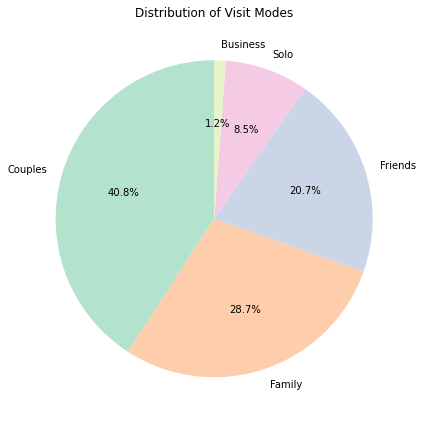

In [177]:
# Mapping aus df_mode: ModeId --> ModeName
mode_mapping = dict(zip(df_mode["VisitModeId"], df_mode["VisitMode"]))

# Mapping auf df_transaction anwenden
df_transaction["VisitModeName"] = df_transaction["VisitMode"].map(mode_mapping)

# Zählen wie oft jeder VisitModeName vorkommt
mode_counts = df_transaction["VisitModeName"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    mode_counts.values,
    labels=mode_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Pastel2.colors
)

plt.title("Distribution of Visit Modes")
plt.axis("equal")
plt.tight_layout()
plt.show()


In [179]:
# Anzahl der Ratings pro UserId
ratings_per_user = df_transaction["UserId"].value_counts()

# Mittelwert und Median
mean_ratings = ratings_per_user.mean()
median_ratings = ratings_per_user.median()

print(f"Average (mean) number of ratings per user: {mean_ratings:.2f}")
print(f"Median number of ratings per user: {median_ratings:.0f}")



Average (mean) number of ratings per user: 1.58
Median number of ratings per user: 1


In [180]:
unique_users = df_transaction["UserId"].nunique()
print(f"Number of unique users: {unique_users}")


Number of unique users: 33530


In [181]:
# Anzahl der Ratings pro User
ratings_per_user = df_transaction["UserId"].value_counts()

# Filter: User mit mehr als 1 Rating
multi_rating_users = (ratings_per_user > 1).sum()

print(f"Number of users with more than one rating: {multi_rating_users}")


Number of users with more than one rating: 10618


In [182]:
# Wie viele Ratings jeder User abgegeben hat
ratings_per_user = df_transaction["UserId"].value_counts()

# Wie viele User genau 1, 2, ..., 5 oder mehr Ratings geschrieben haben
summary = {
    "1 rating": (ratings_per_user == 1).sum(),
    "2 ratings": (ratings_per_user == 2).sum(),
    "3 ratings": (ratings_per_user == 3).sum(),
    "4 ratings": (ratings_per_user == 4).sum(),
    "5 ratings": (ratings_per_user == 5).sum(),
    "more than 5": (ratings_per_user > 5).sum()
}

for category, count in summary.items():
    print(f"{category}: {count} users")


1 rating: 22912 users
2 ratings: 6533 users
3 ratings: 2206 users
4 ratings: 897 users
5 ratings: 431 users
more than 5: 551 users


In [183]:
# Wieviele Ratings hat jeder User abgegeben hat
ratings_per_user = df_transaction["UserId"].value_counts()

# Zählung für 1 bis 20 Ratings
summary = {}
for i in range(1, 21):
    summary[f"{i} rating{'s' if i > 1 else ''}"] = (ratings_per_user == i).sum()

# mehr als 20 aufsummieren
summary["more than 20"] = (ratings_per_user > 20).sum()

for category, count in summary.items():
    print(f"{category}: {count} users")


1 rating: 22912 users
2 ratings: 6533 users
3 ratings: 2206 users
4 ratings: 897 users
5 ratings: 431 users
6 ratings: 204 users
7 ratings: 115 users
8 ratings: 70 users
9 ratings: 56 users
10 ratings: 22 users
11 ratings: 24 users
12 ratings: 12 users
13 ratings: 7 users
14 ratings: 12 users
15 ratings: 10 users
16 ratings: 1 users
17 ratings: 2 users
18 ratings: 1 users
19 ratings: 1 users
20 ratings: 3 users
more than 20: 11 users


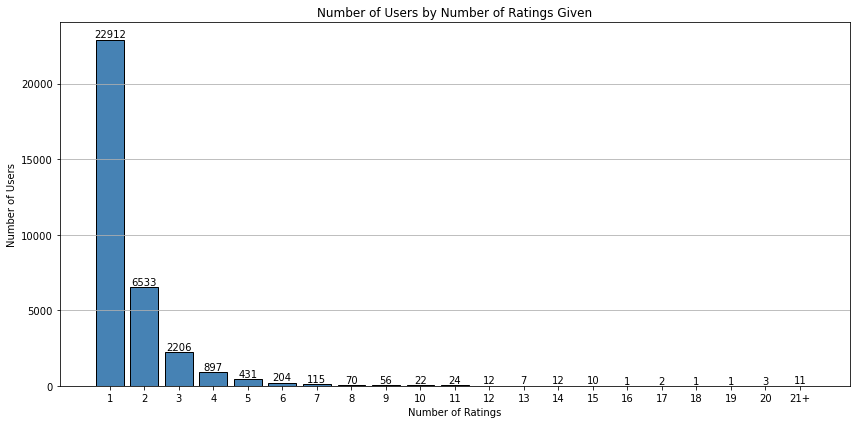

In [184]:
# Zählen v. Ratings pro User
ratings_per_user = df_transaction["UserId"].value_counts()

# Zählen wie viele User genau 1–20 Bewertungen abgegeben haben + dann alles mehr als 20
counts = [(ratings_per_user == i).sum() for i in range(1, 21)]
counts.append((ratings_per_user > 20).sum())
labels = [str(i) for i in range(1, 21)] + ["21+"]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color="steelblue", edgecolor="black")
plt.title("Number of Users by Number of Ratings Given")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.grid(axis="y")

# Beschriftung weil Werte verschwindend gering werden
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


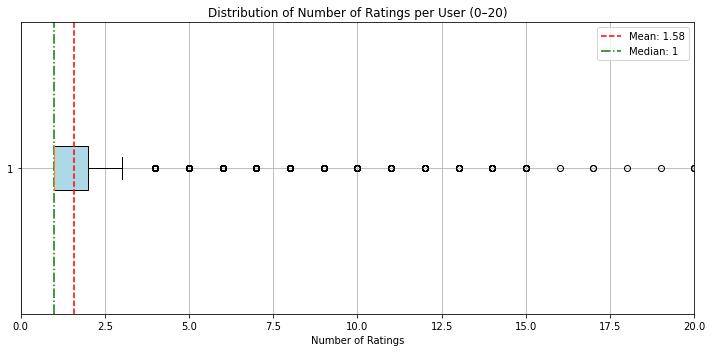

In [223]:
# Ratings pro User
ratings_per_user = df_transaction["UserId"].value_counts()

# Mittelwert u. Median
mean_ratings = ratings_per_user.mean()
median_ratings = ratings_per_user.median()

plt.figure(figsize=(10, 5))
plt.boxplot(ratings_per_user, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Linien für Mean und Median
plt.axvline(mean_ratings, color='red', linestyle='--', label=f'Mean: {mean_ratings:.2f}')
plt.axvline(median_ratings, color='green', linestyle='-.', label=f'Median: {median_ratings:.0f}')

# Fokus auf 0–20 Ratings pro User
plt.xlim(0, 20)
plt.title("Distribution of Number of Ratings per User (0–20)")
plt.xlabel("Number of Ratings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


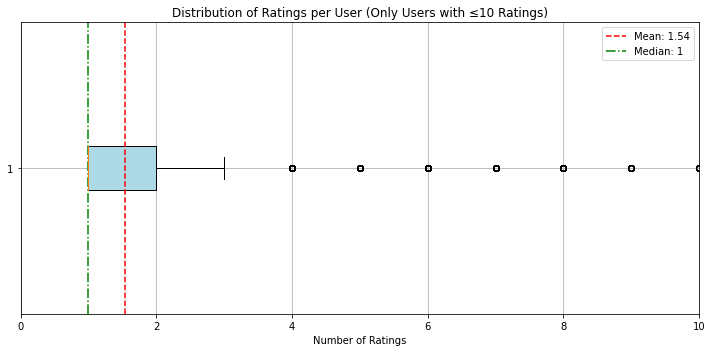

In [224]:
# count Bewertungen pro User
ratings_per_user = df_transaction["UserId"].value_counts()

# nur Nutzer mit maximal 10 Bewertungen reinnehmen
filtered_ratings = ratings_per_user[ratings_per_user <= 10]

# Neuen Mittelwert & Median berechnen
mean_ratings = filtered_ratings.mean()
median_ratings = filtered_ratings.median()

plt.figure(figsize=(10, 5))
plt.boxplot(filtered_ratings, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Linien für Mean und Median
plt.axvline(mean_ratings, color='red', linestyle='--', label=f'Mean: {mean_ratings:.2f}')
plt.axvline(median_ratings, color='green', linestyle='-.', label=f'Median: {median_ratings:.0f}')

plt.xlim(0, 10)
plt.title("Distribution of Ratings per User (Only Users with ≤10 Ratings)")
plt.xlabel("Number of Ratings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


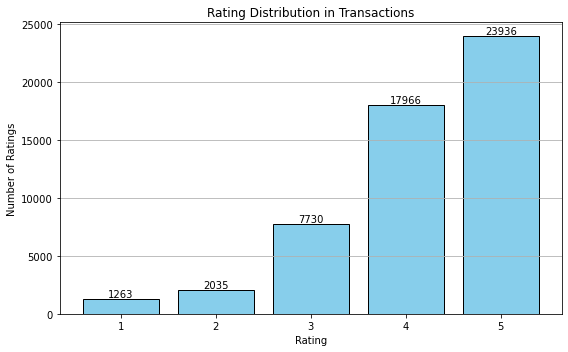

In [188]:
# Zählen d. Anzahl pro Rating-Kat. 1-5
rating_counts = df_transaction["Rating"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color="skyblue", edgecolor="black")

# Werte zeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height), ha='center', va='bottom')

plt.title("Rating Distribution in Transactions")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


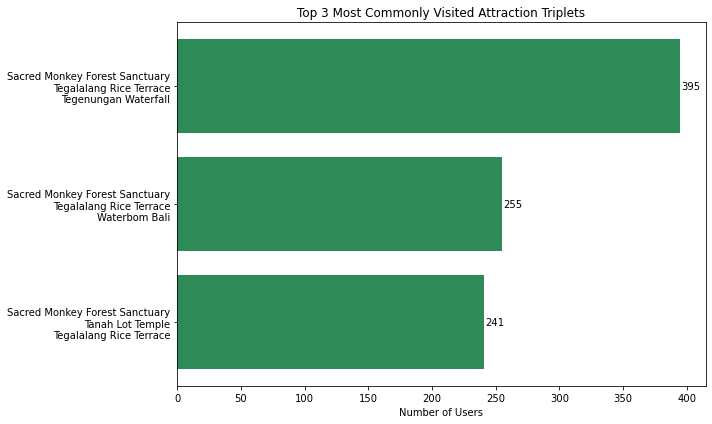

In [225]:
# Mapping AttractionId zu Name
attraction_mapping = dict(zip(df_item["AttractionId"], df_item["Attraction"]))

# User zu Liste eindeutiger Attraktionen
user_attractions = df_transaction.groupby("UserId")["AttractionId"].apply(lambda x: list(set(x)))

# Alle 3er-Kombinationen (nur bei 3 oder mehr Attraktionen)
triplets = []
for attr_list in user_attractions:
    if len(attr_list) >= 3:
        triplets.extend(combinations(sorted(attr_list), 3))

# Zähle Kombos
triplet_counts = Counter(triplets)
top_triplets = triplet_counts.most_common(3)

# Labels & Werte
labels = []
values = []
for triplet, count in top_triplets:
    names = [attraction_mapping.get(aid, f"ID {aid}") for aid in triplet]
    labels.append("\n".join(names))  # Umbruch für bessere Lesbarkeit
    values.append(count)

plt.figure(figsize=(10, 6))
bars = plt.barh(labels[::-1], values[::-1], color="seagreen")
plt.xlabel("Number of Users")
plt.title("Top 3 Most Commonly Visited Attraction Triplets")

# Werte anzeigen
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.tight_layout()
plt.show()


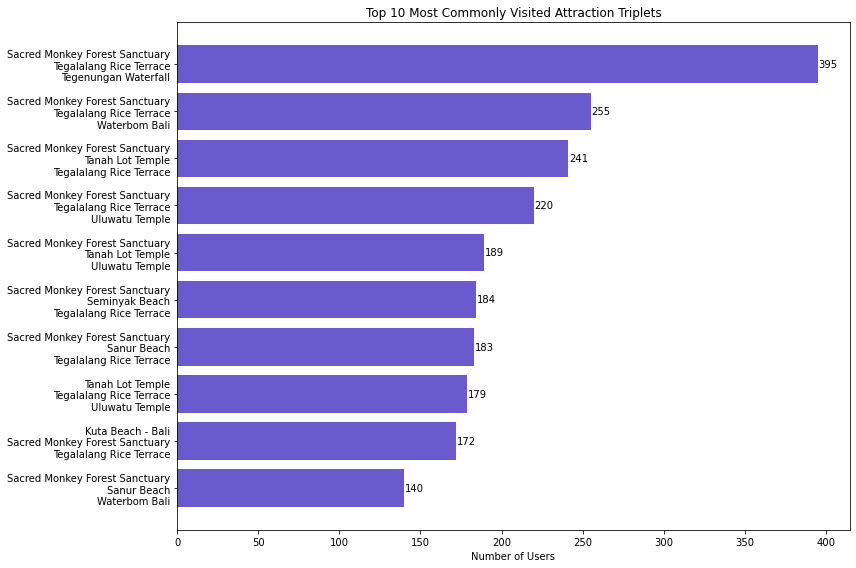

In [190]:
# Mapping AttractionId zu Attraction name
attraction_mapping = dict(zip(df_item["AttractionId"], df_item["Attraction"]))

# User zu Liste eindeutiger Attraktionen
user_attractions = df_transaction.groupby("UserId")["AttractionId"].apply(lambda x: list(set(x)))

# Erstelle 3er-Kombinationen (nur wenn der User 3 oder mehr Attraktionen besucht hat)
triplets = []
for attr_list in user_attractions:
    if len(attr_list) >= 3:
        triplets.extend(combinations(sorted(attr_list), 3))

# Häufigkeit jeder 3er-Kombination zählen
triplet_counts = Counter(triplets)

# Top 10 häufigste Triples
top_triplets = triplet_counts.most_common(10)

# Labels u. Werte f. Plot
labels = []
values = []
for triplet, count in top_triplets:
    names = [attraction_mapping.get(aid, f"ID {aid}") for aid in triplet]
    labels.append("\n".join(names))  # Für bessere Lesbarkeit mit Zeilenumbrüchen
    values.append(count)

plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color="slateblue")
plt.xlabel("Number of Users")
plt.title("Top 10 Most Commonly Visited Attraction Triplets")

# Werte anzeigen
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.tight_layout()
plt.show()


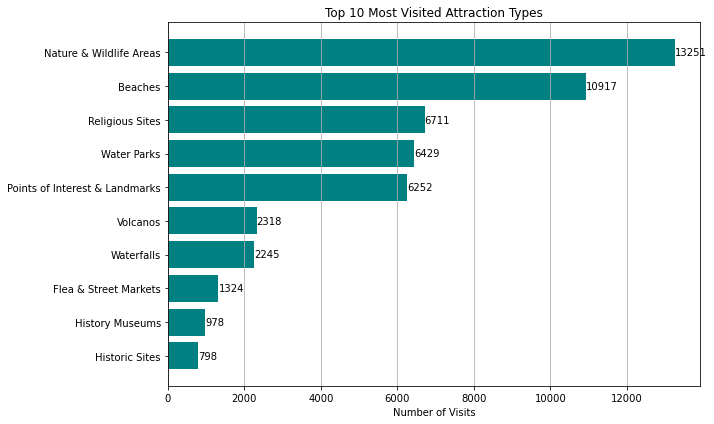

In [191]:
# Transaction + Item (um AttractionTypeId zu bekommen)
merged = df_transaction.merge(df_item[["AttractionId", "AttractionTypeId"]], on="AttractionId", how="left")

# Merge: + Type (um textuelle Bezeichnung zu bekommen)
merged = merged.merge(df_type[["AttractionTypeId", "AttractionType"]], on="AttractionTypeId", how="left")

# Zählen von Vorkommen pro Attraktionstyp
type_counts = merged["AttractionType"].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(type_counts.index[::-1], type_counts.values[::-1], color="teal")
plt.title("Top 10 Most Visited Attraction Types")
plt.xlabel("Number of Visits")
plt.grid(axis="x")

# Werte aanzeigen
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2, str(width), va='center')

plt.tight_layout()
plt.show()


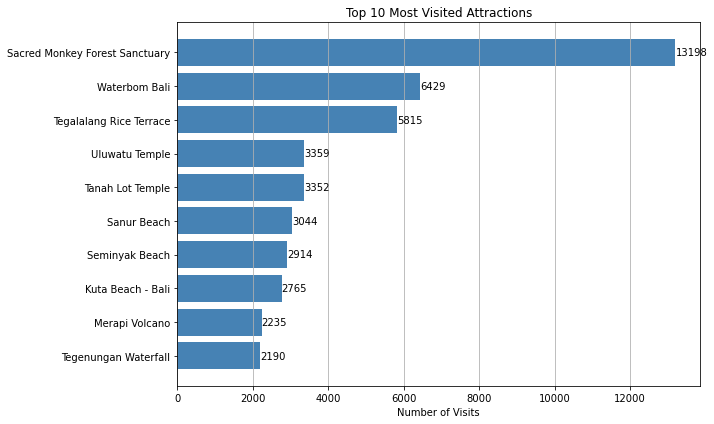

In [192]:
# Merge: AttractionId --> Attraction Name
merged = df_transaction.merge(df_item[["AttractionId", "Attraction"]], on="AttractionId", how="left")

# Zähle Visits pro Attraction
top_attractions = merged["Attraction"].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_attractions.index[::-1], top_attractions.values[::-1], color="steelblue")
plt.title("Top 10 Most Visited Attractions")
plt.xlabel("Number of Visits")
plt.grid(axis="x")

# Werte anzeigen
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2, str(width), va='center')

plt.tight_layout()
plt.show()


In [193]:
# Gruppieren nach UserId + AttractionId und zählen
duplicate_visits = (
    df_transaction.groupby(["UserId", "AttractionId"])
    .size()
    .reset_index(name="VisitCount")
)

# Filter: alles mit mehr als einem visit
repeats = duplicate_visits[duplicate_visits["VisitCount"] > 1]

# Mappe AttractionId zu Attraction-Name
repeats = repeats.merge(df_item[["AttractionId", "Attraction"]], on="AttractionId", how="left")

# Top-Beispiele
print("Sample of attractions visited more than once by the same user:")
print(repeats.sort_values("VisitCount", ascending=False).head(10))


Sample of attractions visited more than once by the same user:
      UserId  AttractionId  VisitCount            Attraction
3419   60799          1171          49        Merapi Volcano
4891   84842          1166          35        Malioboro Road
2977   53429          1166          24        Malioboro Road
2432   44574          1278          22  Ullen Sentalu Museum
4833   83466          1171          22        Merapi Volcano
2277   42223          1166          22        Malioboro Road
4041   70663          1171          20        Merapi Volcano
2586   46913          1171          18        Merapi Volcano
1342   25963          1171          16        Merapi Volcano
4397   76607          1278          15  Ullen Sentalu Museum


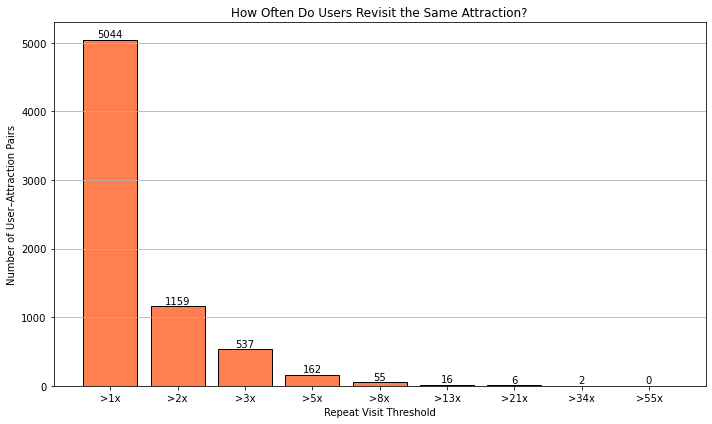

In [194]:
# wie oft hat ein User dieselbe AttractionId besucht?
visit_counts = df_transaction.groupby(["UserId", "AttractionId"]).size()

# Schwellenwerte festlegen (höhere Abstände m. Zunahme)
thresholds = [1, 2, 3, 5, 8, 13, 21, 34, 55]

# Zählen wie viele User-Attraction-Paare jeweils häufiger als Schwelle besucht wurden
threshold_results = {}
for t in thresholds:
    count = (visit_counts > t).sum()
    threshold_results[f">{t}x"] = count


labels = list(threshold_results.keys())
values = list(threshold_results.values())
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color="coral", edgecolor="black")
plt.title("How Often Do Users Revisit the Same Attraction?")
plt.xlabel("Repeat Visit Threshold")
plt.ylabel("Number of User–Attraction Pairs")

# Werte anzeigen
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis="y")
plt.show()


In [196]:
# Funktioniert nicht
#Rating numerisch, falls irgendwas kein numerischer Wert ist. 
#df_transaction["Rating"] = pd.to_numeric(df_transaction["Rating"], errors="coerce")

# Definition von Kombinationen
#combinations_to_check = [
#    (3419, 60799),
#    (4891, 84842),
#    (2977, 53429)
#]

# Überprüfen jeder Kombination
#for user_id, attraction_id in combinations_to_check:
#    user_data = df_transaction[
#        (df_transaction["UserId"] == user_id) &
#        (df_transaction["AttractionId"] == attraction_id)
#    ]
#    rating_distribution = user_data["Rating"].value_counts().sort_index()
    
#    print(f"\nUser {user_id} – Attraction {attraction_id}:")
#    print("Rating distribution:")
#    print(rating_distribution)



User 3419 – Attraction 60799:
Rating distribution:
Series([], Name: Rating, dtype: int64)

User 4891 – Attraction 84842:
Rating distribution:
Series([], Name: Rating, dtype: int64)

User 2977 – Attraction 53429:
Rating distribution:
Series([], Name: Rating, dtype: int64)


In [228]:
#df_transaction["UserId"] = pd.to_numeric(df_transaction["UserId"], errors="coerce")
#df_transaction["AttractionId"] = pd.to_numeric(df_transaction["AttractionId"], errors="coerce")


In [229]:
combinations_to_check = [
    (3419, 60799),
    (4891, 84842),
    (2977, 53429)
]

for user_id, attraction_id in combinations_to_check:
    user_data = df_transaction[
        (df_transaction["UserId"] == user_id) &
        (df_transaction["AttractionId"] == attraction_id)
    ]
    rating_distribution = user_data["Rating"].value_counts().sort_index()
    
    print(f"\nUser {user_id} – Attraction {attraction_id}:")
    print("Rating distribution:")
    print(rating_distribution)



User 3419 – Attraction 60799:
Rating distribution:
Series([], Name: Rating, dtype: int64)

User 4891 – Attraction 84842:
Rating distribution:
Series([], Name: Rating, dtype: int64)

User 2977 – Attraction 53429:
Rating distribution:
Series([], Name: Rating, dtype: int64)


In [230]:
print(df_transaction[["UserId", "AttractionId"]].head())
print(df_transaction.dtypes)


   UserId  AttractionId
0   70456           640
1    7567           640
2   79069           640
3   31019           640
4   43611           640
TransactionId    int64
UserId           int64
VisitYear        int64
VisitMonth       int64
VisitMode        int64
AttractionId     int64
Rating           int64
dtype: object


In [231]:
combinations_to_check = [
    (3419, 60799),
    (4891, 84842),
    (2977, 53429)
]

for user_id, attraction_id in combinations_to_check:
    exists = not df_transaction[
        (df_transaction["UserId"] == user_id) &
        (df_transaction["AttractionId"] == attraction_id)
    ].empty
    print(f"User {user_id} – Attraction {attraction_id} exists in data? {exists}")


User 3419 – Attraction 60799 exists in data? False
User 4891 – Attraction 84842 exists in data? False
User 2977 – Attraction 53429 exists in data? False


In [232]:
# Gruppieren nach UserId & AttractionId, zählen v. eindeutigen TransactionIds
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

# Finde die häufigste Kombination
top_combo = visit_counts.sort_values("VisitCount", ascending=False).head(1)

print("Most frequent UserId–AttractionId combination:")
print(top_combo)


Most frequent UserId–AttractionId combination:
       UserId  AttractionId  VisitCount
30932   60799          1171          49


In [233]:
# User mit häufigsten Mehrfachbesuchen
#Gruppieren: UserId & AttractionId --> zähle Anzahl Transaktionen
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

# häufigste Kombination rausfinden
top_combo = visit_counts.sort_values("VisitCount", ascending=False).head(1)

# Mapping: AttractionId --> AttractionName
attraction_mapping = dict(zip(df_item["AttractionId"], df_item["Attraction"]))

# Hole Werte aus top_combo
user_id = int(top_combo.iloc[0]["UserId"])
attraction_id = int(top_combo.iloc[0]["AttractionId"])
visit_count = int(top_combo.iloc[0]["VisitCount"])
attraction_name = attraction_mapping.get(attraction_id, "Unknown")

print("Most frequent User–Attraction combination:")
print(f"UserId: {user_id}")
print(f"AttractionId: {attraction_id}")
print(f"Attraction Name: {attraction_name}")
print(f"Number of Visits: {visit_count}")


Most frequent User–Attraction combination:
UserId: 60799
AttractionId: 1171
Attraction Name: Merapi Volcano
Number of Visits: 49


In [203]:
# Nochmal wie vorher, aber jetzt mit jeden Rating für jeden Besuch.
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

top_combo = visit_counts.sort_values("VisitCount", ascending=False).head(1)

# Werte extrahieren
user_id = int(top_combo.iloc[0]["UserId"])
attraction_id = int(top_combo.iloc[0]["AttractionId"])
visit_count = int(top_combo.iloc[0]["VisitCount"])

# Attraction-Namen heraussuchen
attraction_mapping = dict(zip(df_item["AttractionId"], df_item["Attraction"]))
attraction_name = attraction_mapping.get(attraction_id, "Unknown")

# Top-Kombination
print("Most frequent User–Attraction combination:")
print(f"UserId: {user_id}")
print(f"AttractionId: {attraction_id}")
print(f"Attraction Name: {attraction_name}")
print(f"Number of Visits: {visit_count}")

# Zeigen v. allen Transaktionen dieses Users für diese Attraction
user_visits = df_transaction[
    (df_transaction["UserId"] == user_id) &
    (df_transaction["AttractionId"] == attraction_id)
][["TransactionId", "VisitYear", "VisitMonth", "Rating"]].sort_values("VisitYear")

# Ausgabe jeder Transaktion inkl. Bewertung
print("\nAll ratings from this user for this attraction:")
print(user_visits.to_string(index=False))


Most frequent User–Attraction combination:
UserId: 60799
AttractionId: 1171
Attraction Name: Merapi Volcano
Number of Visits: 49

All ratings from this user for this attraction:
 TransactionId  VisitYear  VisitMonth  Rating
        203046       2015           8       3
        203006       2016          11       4
        203032       2016          11       3
        203033       2016          11       3
        203034       2016          11       3
        203035       2016          11       4
        203036       2016          11       3
        203037       2016          11       3
        203038       2016          11       3
        203039       2016          11       4
        203040       2016          11       3
        203041       2016          11       3
        203042       2016          11       4
        203043       2016          11       3
        203044       2016          11       3
        203045       2016          11       3
        203047       2016          11   

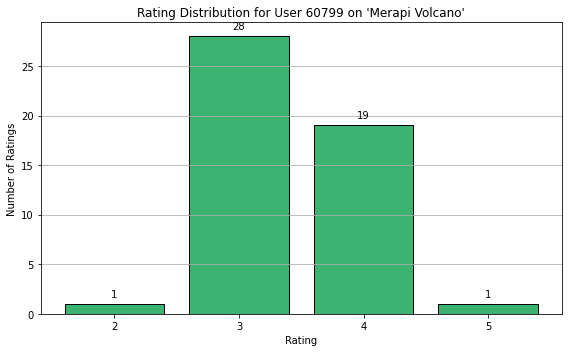

In [204]:
# Same aber mit Visualisierung
#meistbesuchte Kombination
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

top_combo = visit_counts.sort_values("VisitCount", ascending=False).head(1)

# Werte extrahieren
user_id = int(top_combo.iloc[0]["UserId"])
attraction_id = int(top_combo.iloc[0]["AttractionId"])
visit_count = int(top_combo.iloc[0]["VisitCount"])

# Attraction-Name zuordnen
attraction_mapping = dict(zip(df_item["AttractionId"], df_item["Attraction"]))
attraction_name = attraction_mapping.get(attraction_id, "Unknown")

# Transaktionen dieses Nutzers für diese Attraktion
user_visits = df_transaction[
    (df_transaction["UserId"] == user_id) &
    (df_transaction["AttractionId"] == attraction_id)
]

# Ratings zählen
rating_counts = user_visits["Rating"].value_counts().sort_index()


plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color="mediumseagreen", edgecolor="black")
plt.title(f"Rating Distribution for User {user_id} on '{attraction_name}'")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.grid(axis="y")


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [206]:
# User m. zweithöchster Zahl an Mehrfach-Besuchen:

# Gruppiere: UserId + AttractionId -->zähle Transaktionen
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

# Sortieren nach Häufigkeit
visit_counts_sorted = visit_counts.sort_values("VisitCount", ascending=False)

# Zweithäufigste Kombination (Index 1)
second_most_common = visit_counts_sorted.iloc[1]

user_id = int(second_most_common["UserId"])
attraction_id = int(second_most_common["AttractionId"])
visit_count = int(second_most_common["VisitCount"])

print("Second most frequent User–Attraction combination:")
print(f"UserId: {user_id}")
print(f"AttractionId: {attraction_id}")
print(f"Number of Visits: {visit_count}")


Second most frequent User–Attraction combination:
UserId: 84842
AttractionId: 1166
Number of Visits: 35


In [207]:
# nochmal, alle Ratings zusätzlich anzeigen
# Häufigkeiten berechnen
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

# Zweithäufigste Kombination suchen
second_most_common = visit_counts.sort_values("VisitCount", ascending=False).iloc[1]
user_id = int(second_most_common["UserId"])
attraction_id = int(second_most_common["AttractionId"])

# Transaktionen dieses Users für diese Attraction filtern
user_visits = df_transaction[
    (df_transaction["UserId"] == user_id) &
    (df_transaction["AttractionId"] == attraction_id)
][["TransactionId", "Rating"]].sort_values("TransactionId")

print(f"All ratings by User {user_id} for Attraction {attraction_id}:")
print(user_visits.to_string(index=False))


All ratings by User 84842 for Attraction 1166:
 TransactionId  Rating
        200594       4
        200595       4
        200596       4
        200597       4
        200598       4
        200599       4
        200600       4
        200601       4
        200602       4
        200603       4
        200604       4
        200605       4
        200606       2
        200608       4
        200610       4
        200611       4
        200612       4
        200613       4
        200614       3
        200615       3
        200617       3
        200618       3
        200619       4
        200620       4
        200621       4
        200622       4
        200623       4
        200624       2
        200625       4
        200626       4
        200627       5
        200628       2
        200629       4
        200630       3
        200631       4


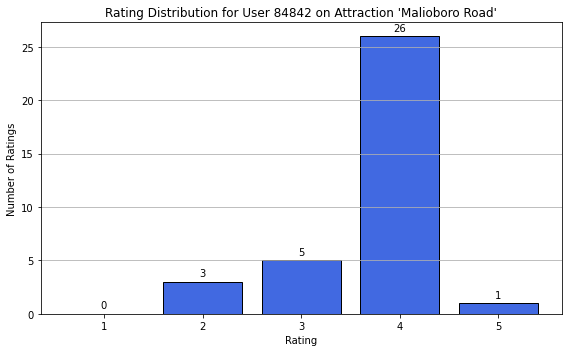

In [235]:
# same, mit Visualisierung

# Finde zweithäufigste Kombination
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

second_most_common = visit_counts.sort_values("VisitCount", ascending=False).iloc[1]
user_id = int(second_most_common["UserId"])
attraction_id = int(second_most_common["AttractionId"])

# Filter: alle Ratings dieser Kombination
user_visits = df_transaction[
    (df_transaction["UserId"] == user_id) &
    (df_transaction["AttractionId"] == attraction_id)
]

# Zähle Bewertungen
rating_counts = user_visits["Rating"].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)


plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color="royalblue", edgecolor="black")
plt.title(f"Rating Distribution for User {user_id} on Attraction 'Malioboro Road'")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.grid(axis="y")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height), ha='center')

plt.tight_layout()
plt.show()


In [210]:
# Gruppiere nach UserId & AttractionId und zähle eindeutige Transaktionen
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)

# Sortiere nach Häufigkeit (absteigend)
visit_counts_sorted = visit_counts.sort_values("VisitCount", ascending=False)

# Dritthäufigste Kombination extrahieren (Index 2)
third_most_common = visit_counts_sorted.iloc[2]

user_id = int(third_most_common["UserId"])
attraction_id = int(third_most_common["AttractionId"])
visit_count = int(third_most_common["VisitCount"])

print("Third most frequent User–Attraction combination:")
print(f"UserId: {user_id}")
print(f"AttractionId: {attraction_id}")
print(f"Number of Visits: {visit_count}")


Third most frequent User–Attraction combination:
UserId: 53429
AttractionId: 1166
Number of Visits: 24


In [211]:
# same, same mit Dritthäufigstem Mehrfachbesucher.
# Finde dritthäufigste Kombination
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)
third_most_common = visit_counts.sort_values("VisitCount", ascending=False).iloc[2]

user_id = int(third_most_common["UserId"])
attraction_id = int(third_most_common["AttractionId"])
visit_count = int(third_most_common["VisitCount"])

print("Third most frequent User–Attraction combination:")
print(f"UserId: {user_id}")
print(f"AttractionId: {attraction_id}")
print(f"Number of Visits: {visit_count}")

# Filtere Transaktionen für diese Kombination
user_visits = df_transaction[
    (df_transaction["UserId"] == user_id) &
    (df_transaction["AttractionId"] == attraction_id)
][["TransactionId", "Rating"]].sort_values("TransactionId")

print("\nAll ratings by this user for this attraction:")
print(user_visits.to_string(index=False))


Third most frequent User–Attraction combination:
UserId: 53429
AttractionId: 1166
Number of Visits: 24

All ratings by this user for this attraction:
 TransactionId  Rating
        199876       5
        199877       5
        199878       3
        199879       5
        199880       5
        199881       4
        199882       5
        199883       5
        199884       5
        199885       5
        199886       5
        199887       5
        199888       4
        199889       5
        199890       4
        199891       5
        199892       5
        199893       4
        199894       4
        199895       4
        199896       3
        199897       5
        199898       5
        199899       5


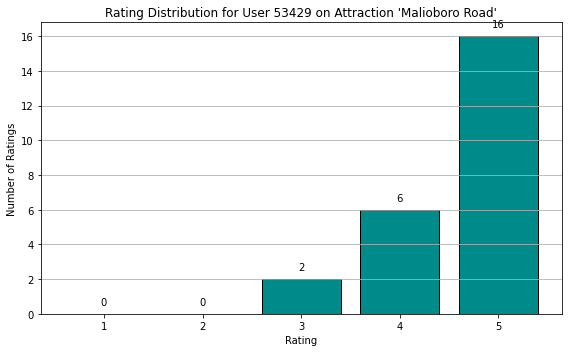

In [236]:
# Dritthäufigste Kombination finden
visit_counts = (
    df_transaction.groupby(["UserId", "AttractionId"])["TransactionId"]
    .count()
    .reset_index(name="VisitCount")
)
third_most_common = visit_counts.sort_values("VisitCount", ascending=False).iloc[2]

user_id = int(third_most_common["UserId"])
attraction_id = int(third_most_common["AttractionId"])
visit_count = int(third_most_common["VisitCount"])

# Transaktionen filtern
user_visits = df_transaction[
    (df_transaction["UserId"] == user_id) &
    (df_transaction["AttractionId"] == attraction_id)
]

# Rating-Verteilung zählen
rating_counts = user_visits["Rating"].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)


plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index.astype(str), rating_counts.values, color="darkcyan", edgecolor="black")
plt.title(f"Rating Distribution for User {user_id} on Attraction 'Malioboro Road'")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.grid(axis="y")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height), ha='center')

plt.tight_layout()
plt.show()
